In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from crea_visualizza_istanza import *
from controlli_ammissibilita import *
from greedy import *
from local_search import *
from greedy_rand import *
from grasp import *
from tabu_search import *
from iterated_local_search import *
from visualizza_grafici import *
from clark_wright import *
import os



delta_small = 1.5
#G_small, residui_dict_small = generate_instance(num_bambini=100, pos_min=20, pos_max=50, seed=10, delta= delta_small)
G_small, residui_dict_small = generate_instance(num_bambini=500, pos_min=5, pos_max=50, seed=3, delta= delta_small)
#plot_graph(G_small, 'grafo_dim_ridotte.png')
img = 'images/small/'
os.makedirs(img, exist_ok=True)


#Stampo i nodi e le relative posizioni
for node, data in G_small.nodes(data=True):
    print(f"Nodo: {node}, Posizione: {data['pos']}, Massima Distanza: {data['max_distance']}")

#print("\n")

#Stampo gli archi e i relativi pesi
#for u, v, data in G_small.edges(data=True):
#    print(f"Arco: {u} - {v}, Peso: {data['weight']}")

subsequentNN = []
schoolNN = []
ls_subsequentNN = []
ls_schoolNN = []
grasp_subsequentNN = []
grasp_schoolNN = []
tabu_subsequentNN = []
tabu_schoolNN = []
Ils_subsequentNN = []
Ils_schoolNN = []
grasp_bI = []
tabu_bI = []
ils_bI = []
grasp_fI = []
tabu_fI = []
ils_fI = []
times_small = []




Nodo: Bambino_1, Posizione: [29.78590562 36.86665202], Massima Distanza: 31.5
Nodo: Bambino_2, Posizione: [18.09071325 27.98724223], Massima Distanza: 12.0
Nodo: Bambino_3, Posizione: [45.18261295 45.333189  ], Massima Distanza: 57.0
Nodo: Bambino_4, Posizione: [10.65133897 14.32592952], Massima Distanza: 15.0
Nodo: Bambino_5, Posizione: [ 7.31602415 24.83644296], Massima Distanza: 18.0
Nodo: Bambino_6, Posizione: [ 6.34442949 25.5574951 ], Massima Distanza: 19.5
Nodo: Bambino_7, Posizione: [34.21148214 17.53192772], Massima Distanza: 25.5
Nodo: Bambino_8, Posizione: [35.43147059 31.58882678], Massima Distanza: 33.0
Nodo: Bambino_9, Posizione: [ 6.07918471 30.14843396], Massima Distanza: 24.0
Nodo: Bambino_10, Posizione: [16.66636011 23.67955387], Massima Distanza: 6.0
Nodo: Bambino_11, Posizione: [17.75862868 36.19120632], Massima Distanza: 25.5
Nodo: Bambino_12, Posizione: [24.8204173  12.05904823], Massima Distanza: 16.5
Nodo: Bambino_13, Posizione: [29.50920581 40.1141644 ], Massim

# Greedy small

In [3]:
(percorsi_sub_NN, sub_NN_obj_val, residui_dict_small_sub_NN), time = subsequent_nearest_neighbour(G_small, residui_dict_small, delta_small)
stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_obj_val}")
check_solution(percorsi_sub_NN, G_small, delta_small)
subsequentNN.append(sub_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.363630
### Visualizzazione dei Percorsi ###

Percorso 1: Scuola → Bambino_460 → Bambino_22 → Bambino_473 → Bambino_302 → Bambino_14 → Bambino_458 → Bambino_396 → Bambino_18 → Bambino_60 → Bambino_371 → Bambino_341 → Bambino_298 → Bambino_278 → Bambino_354 → Bambino_353 → Bambino_332
Percorso 2: Scuola → Bambino_239 → Bambino_242 → Bambino_405 → Bambino_476 → Bambino_279 → Bambino_407 → Bambino_311 → Bambino_50 → Bambino_479 → Bambino_366 → Bambino_106 → Bambino_221 → Bambino_59 → Bambino_493 → Bambino_75 → Bambino_72 → Bambino_133 → Bambino_233 → Bambino_98 → Bambino_175 → Bambino_276 → Bambino_151
Percorso 3: Scuola → Bambino_347 → Bambino_189 → Bambino_301 → Bambino_26 → Bambino_57 → Bambino_40 → Bambino_148 → Bambino_65 → Bambino_101 → Bambino_94 → Bambino_431
Percorso 4: Scuola → Bambino_193 → Bambino_268 → Bambino_118 → Bambino_10 → Bambino_25 → Bambino_309 → Bambino_2 → Bambino_466 → Bambino_32 → Bambino_172 → Bambino_218 → Bambino_236 → Bambino_31 → Bamb

In [4]:
(percorsi_sch_NN, sch_NN_obj_val, residui_dict_small_sch_NN), time = school_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sch_NN)
print(f"Funzione obiettivo: {sch_NN_obj_val}")
check_solution(percorsi_sch_NN, G_small, delta_small)
schoolNN.append(sch_NN_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.031893
Funzione obiettivo: 5001978
Soluzione ammissibile.


In [5]:
(percorsi_sub_NN_R, sub_NN_R_obj_val, residui_dict_small_sub_NN_R), time = subsequent_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
print(f"Funzione obiettivo: {sub_NN_R_obj_val}")
check_solution(percorsi_sub_NN_R, G_small, delta_small)
subsequentNN.append(sub_NN_R_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.296033
Funzione obiettivo: 5502335
Soluzione ammissibile.


In [6]:
(percorsi_sch_NN_R, sch_NN_R_obj_val, residui_dict_small_sch_NN_R), time = school_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
print(f"Funzione obiettivo: {sch_NN_R_obj_val}")
check_solution(percorsi_sch_NN_R, G_small, delta_small)
schoolNN.append(sch_NN_R_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.042873
Funzione obiettivo: 5302248
Soluzione ammissibile.


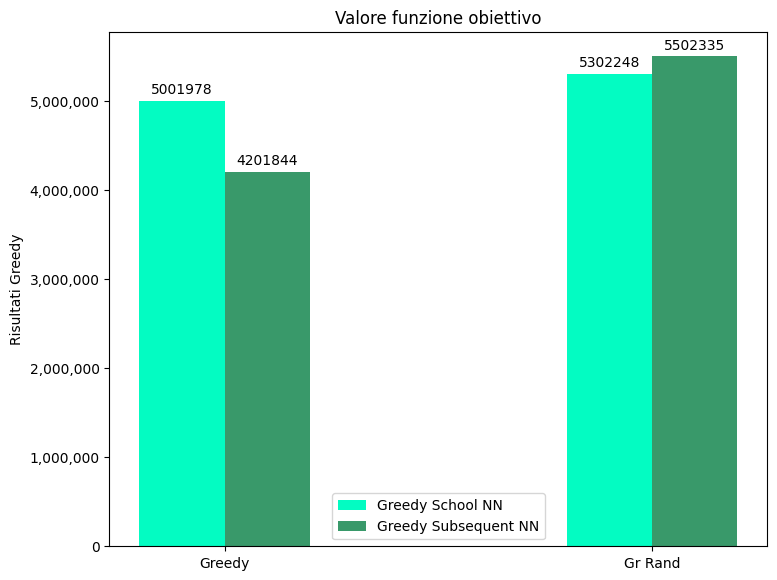

In [7]:
plotSubSchResults(subsequentNN, schoolNN, "Greedy", img + 'greedy_small.png')

# Local Search small

In [8]:
#percorsi_cw, cw_obj_val, residui_dict_small_cw = clark_wright(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_cw)
#print(f"Funzione obiettivo: {cw_obj_val}")
#check_solution(percorsi_cw, G_small, delta_small)
#ls_subsequentNN.append(cw_obj_val)

#percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI = local_search_bI(G_small, residui_dict_small_cw, percorsi_cw, cw_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
#print(f"Funzione obiettivo: {ls_bI_obj_val}")
#check_solution(percorsi_ls_bI, G_small, delta_small)
#ls_subsequentNN.append(ls_bI_obj_val)

In [9]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI), time = local_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_subsequentNN.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.285004
Funzione obiettivo: 4201844
Soluzione ammissibile.


In [10]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_ls_sch_bI), time = local_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_schoolNN.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.387661
Funzione obiettivo: 5001978
Soluzione ammissibile.


In [11]:
(percorsi_sub_ls_fI, sub_ls_fI_obj_val, residui_dict_small_sub_ls_fI), time = local_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {sub_ls_fI_obj_val}")
check_solution(percorsi_sub_ls_fI, G_small, delta_small)
ls_subsequentNN.append(sub_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.429991
Funzione obiettivo: 4201838
Soluzione ammissibile.


In [12]:
(percorsi_sch_ls_fI, sch_ls_fI_obj_val, residui_dict_small_sch_ls_fI), time = local_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {sch_ls_fI_obj_val}")
check_solution(percorsi_sch_ls_fI, G_small, delta_small)
ls_schoolNN.append(sch_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:1.003876
Funzione obiettivo: 5001956
Soluzione ammissibile.


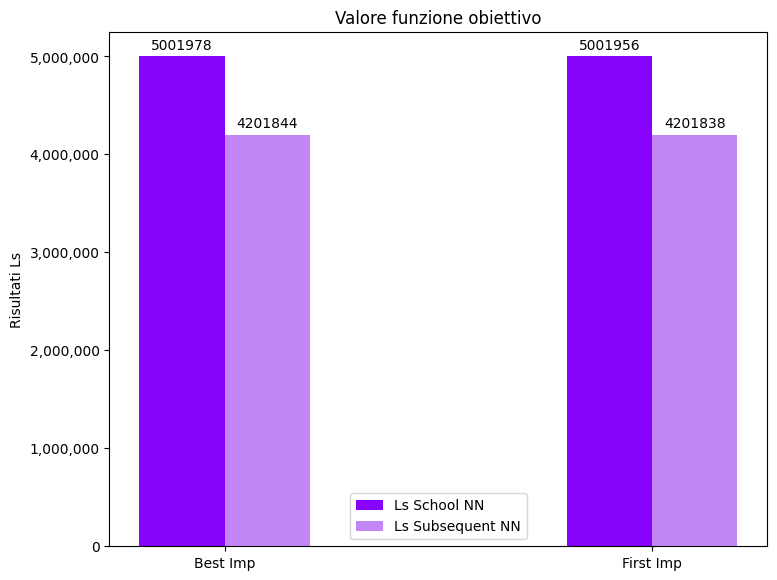

In [13]:
plotSubSchResults(ls_subsequentNN, ls_schoolNN, 'Ls', img + 'ls_small.png')

# GRASP small

1
Tempo impiegato: 00:00:0.329832
Tempo impiegato: 00:00:1.174343
2
Tempo impiegato: 00:00:0.321924
Tempo impiegato: 00:00:1.068364
3
Tempo impiegato: 00:00:0.310861
Tempo impiegato: 00:00:1.256842
4
Tempo impiegato: 00:00:0.320007
Tempo impiegato: 00:00:1.127508
5
Tempo impiegato: 00:00:0.331927
Tempo impiegato: 00:00:0.486511
6
Tempo impiegato: 00:00:0.326411
Tempo impiegato: 00:00:1.502866
7
Tempo impiegato: 00:00:0.310690
Tempo impiegato: 00:00:0.454539
8
Tempo impiegato: 00:00:0.328356
Tempo impiegato: 00:00:1.044938
9
Tempo impiegato: 00:00:0.323825
Tempo impiegato: 00:00:0.993905
10
Tempo impiegato: 00:00:0.312932
Tempo impiegato: 00:00:1.495892
11
Tempo impiegato: 00:00:0.317299
Tempo impiegato: 00:00:1.602843
12
Tempo impiegato: 00:00:0.326676
Tempo impiegato: 00:00:0.991244
13
Tempo impiegato: 00:00:0.319095
Tempo impiegato: 00:00:0.244685
14
Tempo impiegato: 00:00:0.326012
Tempo impiegato: 00:00:0.810828
15
Tempo impiegato: 00:00:0.320575
Tempo impiegato: 00:00:0.519449
16
T

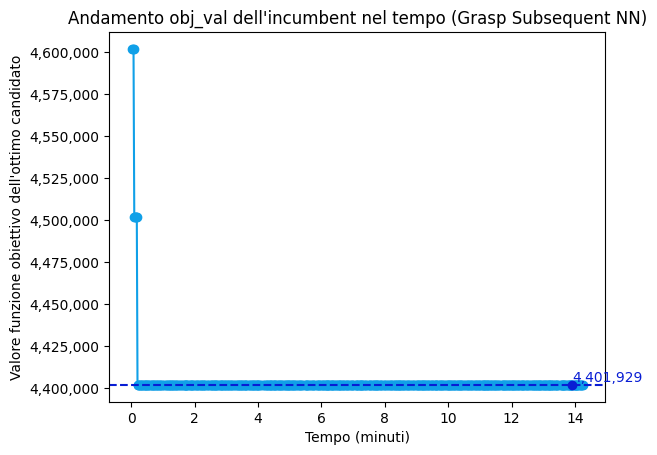

Tempo impiegato: 00:14:15.041383
Funzione obiettivo: 4401929
Soluzione ammissibile.


In [14]:
(percorsi_G_sub_NN_bI, G_sub_NN_bI_obj_val, residui_dict_small_G_sub_NN_bI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=600, ls="local_search_bI", max_len=5)
print(f"Funzione obiettivo: {G_sub_NN_bI_obj_val}")
check_solution(percorsi_G_sub_NN_bI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_bI_obj_val)
grasp_bI.append(G_sub_NN_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.344856
Tempo impiegato: 00:00:1.919649
2
Tempo impiegato: 00:00:0.323087
Tempo impiegato: 00:00:2.776170
3
Tempo impiegato: 00:00:0.324229
Tempo impiegato: 00:00:1.843311
4
Tempo impiegato: 00:00:0.324070
Tempo impiegato: 00:00:1.920030
5
Tempo impiegato: 00:00:0.345630
Tempo impiegato: 00:00:0.783453


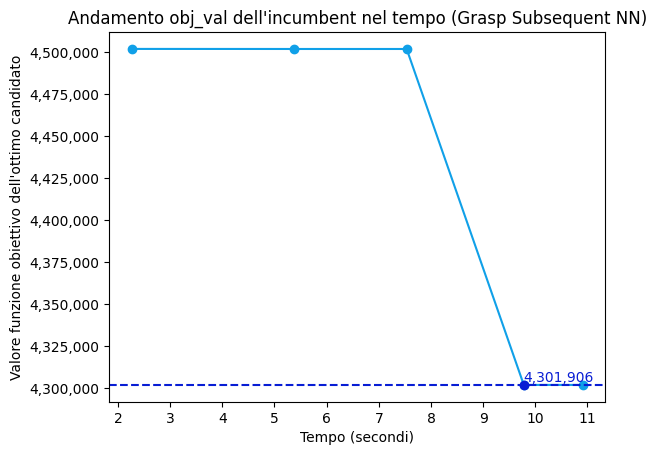

Tempo impiegato: 00:00:10.959702
Funzione obiettivo: 4301906
Soluzione ammissibile.


In [16]:
(percorsi_G_sub_NN_fI, G_sub_NN_fI_obj_val, residui_dict_small_G_sub_NN_fI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_fI", max_len=5)
print(f"Funzione obiettivo: {G_sub_NN_fI_obj_val}")
check_solution(percorsi_G_sub_NN_fI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_fI_obj_val)
grasp_fI.append(G_sub_NN_fI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.041848
Tempo impiegato: 00:00:0.928450
2
Tempo impiegato: 00:00:0.043321
Tempo impiegato: 00:00:0.444635
3
Tempo impiegato: 00:00:0.042746
Tempo impiegato: 00:00:0.697595
4
Tempo impiegato: 00:00:0.043939
Tempo impiegato: 00:00:0.307979
5
Tempo impiegato: 00:00:0.044562
Tempo impiegato: 00:00:0.414249


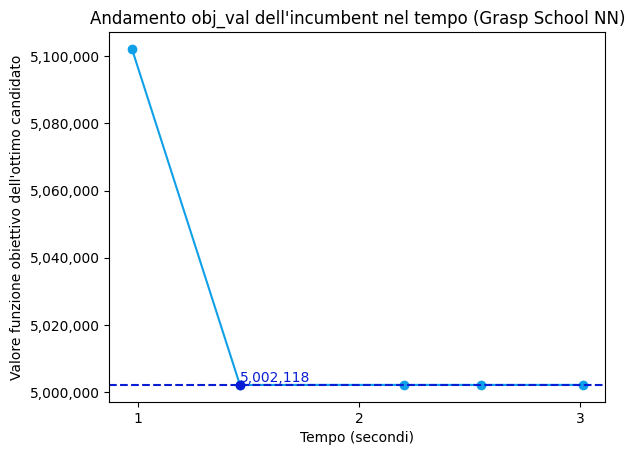

Tempo impiegato: 00:00:3.051973
Funzione obiettivo: 5002118
Soluzione ammissibile.


In [15]:
(percorsi_G_sch_bI, G_sch_bI_obj_val, residui_dict_small_G_sch_NN_bI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_bI", max_len=5)
print(f"Funzione obiettivo: {G_sch_bI_obj_val}")
check_solution(percorsi_G_sch_bI, G_small, delta_small)
grasp_schoolNN.append(G_sch_bI_obj_val)
grasp_bI.append(G_sch_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.057107
Tempo impiegato: 00:00:1.635934
2
Tempo impiegato: 00:00:0.046919
Tempo impiegato: 00:00:1.450553
3
Tempo impiegato: 00:00:0.044936
Tempo impiegato: 00:00:1.122066
4
Tempo impiegato: 00:00:0.050069
Tempo impiegato: 00:00:2.180777
5
Tempo impiegato: 00:00:0.047232
Tempo impiegato: 00:00:1.341113


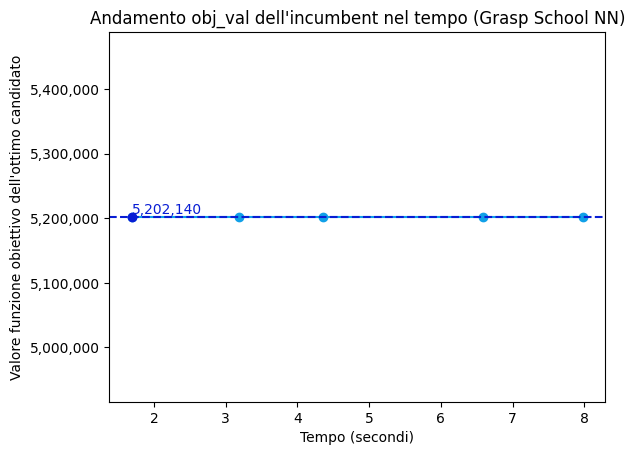

Tempo impiegato: 00:00:8.019815
Funzione obiettivo: 5202140
Soluzione ammissibile.


In [17]:
(percorsi_G_sch_fI, G_sch_fI_obj_val, residui_dict_small_G_sch_NN_fI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=5, ls="local_search_fI", max_len=5)
print(f"Funzione obiettivo: {G_sch_fI_obj_val}")
check_solution(percorsi_G_sch_fI, G_small, delta_small)
grasp_schoolNN.append(G_sch_fI_obj_val)
grasp_fI.append(G_sch_fI_obj_val)
times_small.append(time)

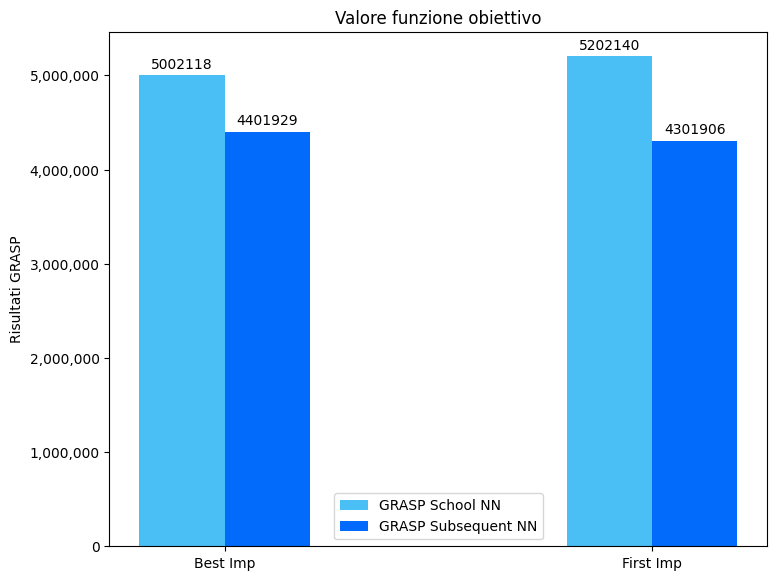

In [18]:

plotSubSchResults(grasp_subsequentNN, grasp_schoolNN, 'GRASP', img + 'grasp_small.png')


# Tabu Search small

Iterazione: 0, Non migliorato: 0, Current OV: 4201844, Best OV: 4201844
Iterazione: 1, Non migliorato: 0, Current OV: 4201843, Best OV: 4201843
Iterazione: 2, Non migliorato: 0, Current OV: 4201842, Best OV: 4201842
Iterazione: 3, Non migliorato: 0, Current OV: 4101815, Best OV: 4101815
Iterazione: 4, Non migliorato: 0, Current OV: 4101814, Best OV: 4101814
Iterazione: 5, Non migliorato: 0, Current OV: 4101813, Best OV: 4101813
Iterazione: 6, Non migliorato: 0, Current OV: 4101812, Best OV: 4101812
Iterazione: 7, Non migliorato: 0, Current OV: 4101811, Best OV: 4101811
Iterazione: 8, Non migliorato: 1, Current OV: 4101811, Best OV: 4101811
Iterazione: 9, Non migliorato: 2, Current OV: 4101811, Best OV: 4101811
Iterazione: 10, Non migliorato: 3, Current OV: 4101811, Best OV: 4101811
Iterazione: 11, Non migliorato: 4, Current OV: 4101811, Best OV: 4101811
Iterazione: 12, Non migliorato: 5, Current OV: 4101825, Best OV: 4101811
Iterazione: 13, Non migliorato: 6, Current OV: 4101824, Best 

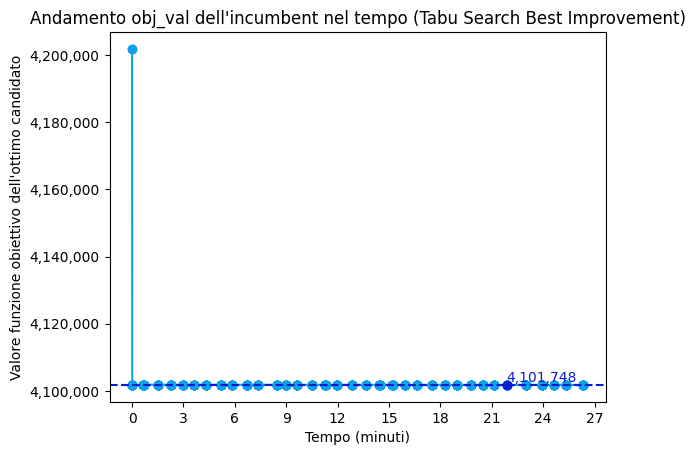

Tempo impiegato: 00:26:19.334083
Funzione obiettivo: 4101748
Soluzione ammissibile.


In [20]:
(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_obj_val)
tabu_bI.append(tabu_sub_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 4201844, Best OV: 4201844
Iterazione: 1, Non migliorato: 0, Current OV: 4201843, Best OV: 4201843
Iterazione: 2, Non migliorato: 0, Current OV: 4201842, Best OV: 4201842
Iterazione: 3, Non migliorato: 0, Current OV: 4201841, Best OV: 4201841
Iterazione: 4, Non migliorato: 0, Current OV: 4201840, Best OV: 4201840
Iterazione: 5, Non migliorato: 0, Current OV: 4101813, Best OV: 4101813
Iterazione: 6, Non migliorato: 0, Current OV: 4101812, Best OV: 4101812
Iterazione: 7, Non migliorato: 0, Current OV: 4101811, Best OV: 4101811
Iterazione: 8, Non migliorato: 1, Current OV: 4101811, Best OV: 4101811
Iterazione: 9, Non migliorato: 2, Current OV: 4101811, Best OV: 4101811
Iterazione: 10, Non migliorato: 3, Current OV: 4101811, Best OV: 4101811
Iterazione: 11, Non migliorato: 4, Current OV: 4101811, Best OV: 4101811
Iterazione: 12, Non migliorato: 5, Current OV: 4101821, Best OV: 4101811
Iterazione: 13, Non migliorato: 5, Current OV: 4101821, Best 

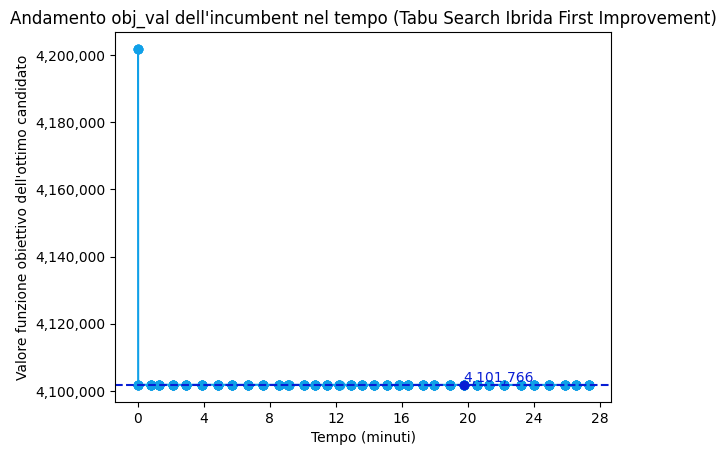

Tempo impiegato: 00:27:21.042378
Funzione obiettivo: 4101766
Soluzione ammissibile.


In [21]:
(percorsi_tabu_sub_fI, tabu_sub_fI_obj_val, residui_dict_small_tabu_sub_fI), time = tabu_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sub_fI_obj_val}")
check_solution(percorsi_tabu_sub_fI, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_fI_obj_val)
tabu_fI.append(tabu_sub_fI_obj_val)
times_small.append(time)

In [ ]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_obj_val)
tabu_bI.append(tabu_sch_obj_val)
times_small.append(time)

In [ ]:
(percorsi_tabu_sch_fI, tabu_sch_fI_obj_val, residui_dict_small_tabu_sch_fI), time = tabu_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
print(f"Funzione obiettivo: {tabu_sch_fI_obj_val}")
check_solution(percorsi_tabu_sch_fI, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_fI_obj_val)
tabu_fI.append(tabu_sch_fI_obj_val)
times_small.append(time)

In [ ]:
plotSubSchResults(tabu_subsequentNN, tabu_schoolNN, 'Tabu', img + 'tabu_small.png')

# Iterated Local Search small

In [ ]:
(percorsi_ILS_sub_bI, ILS_sub_bI_obj_val, residui_dict_small_ILS_sub_bI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_bI")
print(f"Funzione obiettivo: {ILS_sub_bI_obj_val}")
check_solution(percorsi_ILS_sub_bI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_bI_obj_val)
ils_bI.append(ILS_sub_bI_obj_val)
times_small.append(time)

In [ ]:
(percorsi_ILS_sub_fI, ILS_sub_fI_obj_val, residui_dict_small_ILS_sub_fI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_fI")
print(f"Funzione obiettivo: {ILS_sub_fI_obj_val}")
check_solution(percorsi_ILS_sub_fI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_fI_obj_val)
ils_fI.append(ILS_sub_fI_obj_val)
times_small.append(time)

In [ ]:
(percorsi_ILS_sch_bI, ILS_sch_bI_obj_val, residui_dict_small_ILS_sch_bI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_bI")
print(f"Funzione obiettivo: {ILS_sch_bI_obj_val}")
check_solution(percorsi_ILS_sch_bI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_bI_obj_val)
ils_bI.append(ILS_sch_bI_obj_val)
times_small.append(time)

In [ ]:
(percorsi_ILS_sch_fI, ILS_sch_fI_obj_val, residui_dict_small_ILS_sch_fI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_fI")
print(f"Funzione obiettivo: {ILS_sch_fI_obj_val}")
check_solution(percorsi_ILS_sch_fI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_fI_obj_val)
ils_fI.append(ILS_sch_fI_obj_val)
times_small.append(time)

In [ ]:
plotSubSchResults(Ils_subsequentNN, Ils_schoolNN, 'ILS', img + 'ils_small.png')


In [ ]:

plotMetaheuristicsResults(grasp_bI, tabu_bI, ils_bI, img + 'metaheuristics_bI_small.png')

plotMetaheuristicsResults(grasp_fI, tabu_fI, ils_fI, img + 'metaheuristics_fI_small.png', bestImp=False)
 

In [ ]:
subsequent_results = []
school_results = []

subsequent_results.extend(subsequentNN)
subsequent_results.extend(ls_subsequentNN)
subsequent_results.extend(grasp_subsequentNN)
subsequent_results.extend(tabu_subsequentNN)
subsequent_results.extend(Ils_subsequentNN)

school_results.extend(schoolNN)
school_results.extend(ls_schoolNN)
school_results.extend(grasp_schoolNN)
school_results.extend(tabu_schoolNN)
school_results.extend(Ils_schoolNN)

plot_greedy_based_results(subsequent_results, img + 'subsequent_results_small.png', 'SubsequentNN')
plot_greedy_based_results(school_results,  img + 'school_results_small.png', 'SchoolNN')

In [35]:
results = []
results.extend(subsequentNN)
results.extend(schoolNN)
results.extend(ls_subsequentNN)
results.extend(ls_schoolNN)
results.extend(grasp_subsequentNN)
results.extend(grasp_schoolNN)
results.extend(tabu_subsequentNN)
results.extend(tabu_schoolNN)
results.extend(Ils_subsequentNN)
results.extend(Ils_schoolNN)


In [ ]:
plot_all_results(results, img + 'all_small.png')

In [ ]:
plot_time_results(times_small, img + 'times_small.png', medium=False)